<h3 style="text-align: center;"> <strong> UNIVERSIDAD TECNOLÓGICA DE PANAMÁ </strong></h3>
<h3 style="text-align: center;">FACULTAD DE INGENIERÍA DE SISTEMAS COMPUTACIONALES</h3>
<h3 style="text-align: center;">MAESTRÍA EN ANALÍTICA DE DATOS</h3>
    
<h1 style="text-align: center;"><strong>-----LABORATORIO N°2:  APRENDIZAJE SUPERVISADO 1-----</strong></h1>
<h3 style="text-align: center;">MACHINE LEARNING Y ANALITICA PRESCRIPTIVA - S108</h3>




|  **FACILITADOR** | Dr. José Carlos Rangel Ortiz          |
|-----------------|---------------------------------------|
| **MÓDULO 2**    | Clasificadores  |
|  **UNIDAD 1**    | Algoritmos de Aprendizaje Supervisado |
    

| **NOMBRE DEL ESTUDIANTE:** | EVARISTO DE GRACIA__8-788-1186 |
|----------------------------|-----------------------------------------------------------------------------------------|
    


# Introducción 


El Aprendizaje Automático(ML) y la Ciencia de Datos se entrelazan como dos piezas de un rompecabezas, formando una poderosa herramienta para la extracción de conocimiento a partir de datos. El ML enriquece el campo de la Ciencia de Datos, impulsando el análisis y la toma de decisiones informadas.

El ML dota a los científicos de datos de algoritmos inteligentes que pueden aprender de grandes conjuntos de datos sin necesidad de una programación explícita. Estos algoritmos son capaces de identificar patrones complejos, realizar predicciones y tomar decisiones autónomas, lo que permite a los científicos de datos:

- Automatizar tareas tediosas
- Descubrir patrones ocultos
- Realizar predicciones precisas
- Realizar predicciones precisas

**Casos de uso del Aprendizaje Automático en la Ciencia de Datos**

- Análisis de fraude
- Recomendación de productos
- Detección de anomalías
- Segmentación de clientes
- Reconocimiento de imágenes


En este laboratorio se daran los primeros pasos con algoritmos de ML, en este caso Aprendizaje Supervisado el cual se enfoca en el entrenamiento de modelos utilizando una variable como guía del entrenamiento. Nos enfocaremos en primer lugar con los algoritmos de Regresión Lineal, Regresión Logística y Árboles de Decisión. Se presentan para cada uno ejemplos desarrollados donde se expone su uso y forma de análisis de los mismos. 

La Ciencia de Datos proporciona el marco y la metodología para recopilar, limpiar, preparar y analizar datos, mientras que el ML ofrece las herramientas y algoritmos para aprender de estos datos y extraer conocimiento. Juntos, forman un dúo dinámico que permite a las organizaciones transformar sus datos en activos valiosos que pueden impulsar la innovación, la eficiencia y la toma de decisiones estratégicas.



<div class="alert alert-success", role="alert">
    <h1 style="font-size: 1.5em;">Parte 1 </h1>
    <h2 style="font-size: 1.5em; "><strong>Regresión Lineal Simple</strong></h2>
</div>


La regresión lineal simple es un tipo de algoritmo de aprendizaje supervisado que permite generar un modelo de predicción para un *target* o varible objetivo discreta. 
El enfoque simple de este algoritmo se recibe una conjunto de datos de entrada con una sola columa o variable y permite realizar la predicción de una variable. Este algoritmo al igual que todos lo algoritmos supervisados requiere de un conjunto de datos con el valor real dentro del conjunto de entrenamiento. 
En este caso se utilizara el *LinearRegression* de la librería de SciKitLearn para predecir valores numéricos. 
El enfoque de Regresión Lineal Simple genera una recta que representa los valores del conjunto de entrenamiento.
La ecuación que la representa sería:

$y=mX + b$

Siendo $m$ la pendiente de la recta que en este caso consiste en un solo valor al utilizar solo una variable de entrada. Cuando se utilicen más valores, $m$ se interpreta como un arreglo o lista de coeficientes que multiplican a cada variable utilizada en el entrenamiento.
El algoritmo de Regresión Lineal de SciKitLearn calcula estos parámetros que representan los datos de entrenamiento. 


## Importar Librerias

In [2]:
import pandas as pd
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.pipeline import make_pipeline

from sklearn.model_selection import cross_val_score

## Cargar el dataset del promedio de las altas temperaturas
En este caso se plantea un modelo que permita el calculo de la temperatura **(variable *y*)**, recibiendo como entrada el año **(variable *x*)**, de tal manera que se obtiene una ecuación con la siguiente estructura:

$temperatura = m(anio) + intercepto$

In [2]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


## División en Train/Test 
Cuando se realiza un entrenamiento de un modelo de ML es recomendable dividir el dataset en dos secuencias, una para entrenar y otra para evaluar el modelo entrenado. La función *train_test_split* nos permite realizar esta divisióon de nuestros conjuntos de datos. 
En este ejemplo como en la mayoria de los códigos de entrenamiento, se utiliza un conjunto de valores para entrenar el modelo, se suele llamar **X** al conjunto de valores o la variable que se usa para entrenar el modelo y se suele llamar **Y** a la columna o variable objetivo de nuestro dataset y la cual el modelo debe aprender a predecir. En este caso al no especificar porcentaje se utiliza por defecto el 25% para test y el 75% para train.

Esta función por lo tanto recibe basicamente 2 elementos, el dataset con la variable **X** y el dataset con la varible **Y**. La funcion devuelve 4 listas a saber:
- **X_train** : son las instancias seleccionadas de la variable X que se usaran para **entrenar** el modelo.
- **X_test**: son las instancias seleccionadas de la variable X que se usaran para **evaluar** el modelo.
- **y_train**: son las categorias o valores reales de las instancias contenidas en la lista **X_train**.
- **y_test**: son las categorias o valores reales de las instancias contenidas en la lista **X_test**.

El entrenamiento en este caso utilizará los valores con el sufijo \_train para entrenar y los que tienen el sufijo \_test para validar el modelo entrenado.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, random_state=11)

# En este caso el .values retorna una lista de flotantes  [123,3,...,5] --> [[123], [3], ... , [5]]
# y el .reshape(-1,1) especifica que esa lista se transforme a un arreglo de una columna
# debido a que es el formato que maneja SKLearn

In [4]:
print(f'El conjunto original tenia {len(nyc)} instancias, el conjunto de train tiene {len(X_train)} y el conjunto de test {len(X_test)} instancias.')

El conjunto original tenia 124 instancias, el conjunto de train tiene 93 y el conjunto de test 31 instancias.


## Escalamiento de los Datos
Para facilitar la convergencia se realiza un proceso de escalado a los datos de entrenamiento y test, esto asegura que los valores estarán en un mismo rango. En este ejemplo se aplica escalado para mostrar el procedimiento pero se debe considerar que la regresión lineal se encuentra dentro de los algoritmos que no suele necesitar el uso de escalmientos numéricos.

In [5]:
# se utiliza para escalar los valores en un mismo rango
sc_X = StandardScaler()
X_trainSC=sc_X.fit_transform(X_train)
X_testSC=sc_X.transform(X_test)

In [6]:
X_test

array([[1968],
       [1897],
       [1972],
       [1904],
       [1911],
       [2011],
       [1895],
       [1931],
       [1956],
       [1951],
       [1924],
       [1992],
       [1934],
       [1999],
       [1901],
       [1937],
       [1985],
       [1970],
       [1983],
       [2008],
       [1978],
       [1925],
       [1930],
       [1960],
       [1910],
       [1957],
       [1953],
       [1981],
       [1917],
       [1916],
       [1921]], dtype=int64)

## Entrenamiento del Modelo
Para el proceso de entrenar el modelo primero se crea una instancia del modelo a utilizar y posteriormente se usa el metodo **.fit()** para que se envie el conjunto de entrenamiento y se realice el entrenamiento del modelo. Cada algoritmo tiene un conjunto de parámetros que puede recibir y que permiten ajustar o mejorar el resultado.

In [7]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_trainSC, y=y_train)

LinearRegression()

In [8]:
print(f'El coeficiente de la ecuación es {linear_regression.coef_[0]:0.4f} y la intercepción con el eje es en el punto {linear_regression.intercept_:0.4f}.')
print(f'Ecuación resultante: y={linear_regression.coef_[0]:0.4f}X + {linear_regression.intercept_:0.4f}') 

El coeficiente de la ecuación es 0.6967 y la intercepción con el eje es en el punto 37.6892.
Ecuación resultante: y=0.6967X + 37.6892


## Evaluación del Modelo
Para evaluar el modelo se envía mediante la funcion **predict()** el conjunto de test o evaluación al modelo, esto realiza las predicciones para los valores recibidos.
De igual manera usando la funcion **score()** la cual recibe el conjunto de test y el valor real del conjunto de test, se puede obtener la métrica de evaluación del modelo, este se interpreta como un valor de $R^2$.  La mejor puntuación posible es $1.0$ y puede ser negativa (porque el modelo puede ser arbitrariamente peor). Un modelo constante que siempre predice el valor esperado de y, sin tener en cuenta las características de entrada, obtendría una puntuación $R^2$ de $0.0$.

# Cálculo del error/score del modelo mediante el coeficiente de determinación $R^2$

El R-cuadrado es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como coeficiente de determinación, o coeficiente de determinación múltiple si se trata de regresión múltiple.

La definición de $R^2$ es bastante sencilla: es el porcentaje de la variación en la variable de respuesta que es explicado por un modelo lineal. 

 $$R^2(y,\hat{y}) =1 - \frac{\sum_{i=1}^{n}(y_i-\hat{y_i})^2}{\sum_{i=1}^{n}(y_i-\bar{y})^2}$$

 Donde
 $$y_i=Valor Verdadero$$
$$\hat{y_i}=Predicción$$
$$\bar{y} = \frac{1}{n}\sum_{i=1}^{n}y_i$$
$$\sum_{i=1}^{n}(y_i-\hat{y_i})^2 = \sum_{i=1}^{n}\epsilon_i^2$$

In [9]:
# realizar la prediccion
predicted = linear_regression.predict(X_testSC)
expected = y_test

# Imprimir cada 5 valores de la predicción 
for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')
        
print(f'El score obtenido por el modelo es {linear_regression.score(X_testSC, y_test)}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70
El score obtenido por el modelo es -0.033370346388810646


## Predicción de Temperaturas Futuras y Pasadas

In [10]:
# Función lambda para predicción de valores mediante la construcción de la ecuación
predictor = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

In [11]:
# Predicción usando el método predict
# El método espera un vector de vectores, 
# por eso para un valor simple se debe 
# usar una notación de doble [[]]

valTest=sc_X.transform([[2019]])

print(f'La predicion para el anio 2019 usando el modelo  es {linear_regression.predict(valTest)}.')

La predicion para el anio 2019 usando el modelo  es [38.84399018].


In [12]:
# Predicción usando ecuación
print(f'La predición para el anio 2019 usando la función lambda  es {predictor(valTest)}.')

La predición para el anio 2019 usando la función lambda  es [[38.84399018]].


## Visualizar el dataset con la línea de regresión
Se puede graficar el resultado para comparar con la información del dataset.

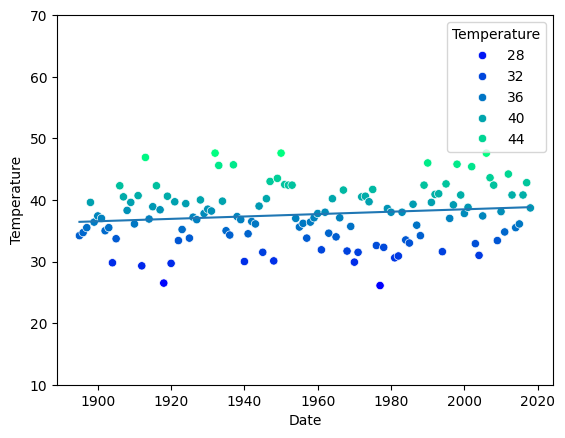

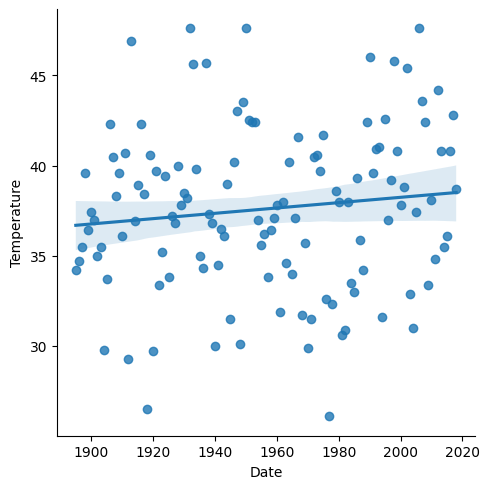

In [13]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',hue='Temperature', palette='winter', legend=True)
axes.set_ylim(10, 70)

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
x=x.reshape(-1, 1)  #[1980,2004] --> [ [1980], [2004]]
x= sc_X.transform(x)
y = predictor(x)

line = plt.plot(sc_X.inverse_transform(x), y)

# Usando un sns.lmplot
sns.lmplot(data=nyc, x='Date', y='Temperature')


<div class="alert alert-info", role="success">
    <h1 style="font-size: 2em;">Modelos con Regresión Lineal Múltiple </h1>
    <h1 style="font-size: 2em;">Entrene un modelo de predicción del peso de un pinguino usando solo las variables numéricas, tampoco utilice el año del dataset. </h1>
</div>

En este caso utilizará el enfoque múltiple en el cual el conjunto X contiene más de una variable para realizar el entrenamiento y predicción, por lo  cual, en este casos el conjunto **X** es una matriz y el conjunto **Y** un vector o lista de una dimensión. 

## **[1]** Cargue el dataset y elimine los NaNs de ser necesario

In [14]:
import pandas as pd
preprocess_penguins_df = pd.read_csv("penguins_size.csv")
preprocess_penguins_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [15]:
# Elimina todas las filas con NaN
cleaned_penguins = preprocess_penguins_df.dropna()
print(f"Filas originales: {len(preprocess_penguins_df)}")
print(f"Filas después de eliminar NaN: {len(cleaned_penguins)}")

Filas originales: 344
Filas después de eliminar NaN: 334


In [16]:
print(cleaned_penguins.isna().sum())

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


## **[2]** Genere el dataset solo con las variables numéricas (función **.drop()**)

In [17]:
numeric_penguins = cleaned_penguins.drop(columns=cleaned_penguins.select_dtypes(exclude=['number']).columns)
print(numeric_penguins.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0              39.1             18.7              181.0       3750.0
1              39.5             17.4              186.0       3800.0
2              40.3             18.0              195.0       3250.0
4              36.7             19.3              193.0       3450.0
5              39.3             20.6              190.0       3650.0


## **[3]** Divida el dataset en conjunto de Train y Test

In [18]:
from sklearn.model_selection import train_test_split
X = numeric_penguins.drop(columns=['body_mass_g'])  # Variables predictoras
y = numeric_penguins['body_mass_g']                 # Variable objetivo

# 2. train (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,           # Proporción para test (20%)
    random_state=42          # Semilla para reproducibilidad
)

# 3. Verificar tamaños
print(f"Train - X: {X_train.shape}, y: {y_train.shape}")
print(f"Test - X: {X_test.shape}, y: {y_test.shape}")

Train - X: (267, 3), y: (267,)
Test - X: (67, 3), y: (67,)


## **[4]** Entrene el modelo de predicción mediante Regresión Lineal

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)  # Entrenamiento con datos de entrenamiento

# 2. Predecir con los datos de prueba
y_pred = model.predict(X_test)

# 3. Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")

# 4. Coeficientes del modelo (importancia de cada variable)
print("\nCoeficientes del modelo:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

Error Cuadrático Medio (MSE): 137599.06
Coeficiente de Determinación (R²): 0.77

Coeficientes del modelo:
culmen_length_mm: 3.16
culmen_depth_mm: 13.31
flipper_length_mm: 50.76


## **[5]** Calcule el *score* de su modelo

In [20]:
# Calcular R² en los conjuntos de entrenamiento y prueba
train_score = model.score(X_train, y_train)  # R² para entrenamiento
test_score = model.score(X_test, y_test)     # R² para prueba

print(f"R² en entrenamiento: {train_score:.4f}")
print(f"R² en prueba: {test_score:.4f}")

print(f'\nEl score obtenido por el modelo es {model.score(X_test, y_test)}')

R² en entrenamiento: 0.7616
R² en prueba: 0.7747

El score obtenido por el modelo es 0.7747370815006249


## Convertir a variable numérica el género, la isla y la especie y entrenar nuevamente.
Utilice el enfoque de LabelEncoding para convertir las columnas categóricas originales (especie, isla y sexo) a numéricas y entrene un nuevo modelo.
Puede consultar la siguiente pagina : https://www.turing.com/kb/convert-categorical-data-in-pandas-and-scikit-learn#label-encoding 

## **[6]** Genere el las secuencias X & Y para entrenar el modelo

In [21]:
# Cargar datos originales
df = pd.read_csv("penguins_size.csv")

# Eliminar filas con NaN
cleaned_penguins = df.dropna().copy()

# Verificar columnas categóricas originales
print("Columnas originales:", cleaned_penguins.columns.tolist())

Columnas originales: ['species', 'island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']


In [22]:
# X: Matriz de características 
X = cleaned_penguins.drop(columns=['body_mass_g', 'species', 'island', 'sex'])

# y: Vector objetivo (variable a predecir)
y = cleaned_penguins['body_mass_g']

# Verificación
print("Forma de X:", X.shape)  
print("Forma de y:", y.shape)  

Forma de X: (334, 3)
Forma de y: (334,)


## **[7]** Aplique el LabelEncoder

In [23]:
# Inicializar LabelEncoder
le = LabelEncoder()

# Aplicar a cada columna categórica
cleaned_penguins['species_encoded'] = le.fit_transform(cleaned_penguins['species'])
cleaned_penguins['island_encoded'] = le.fit_transform(cleaned_penguins['island'])
cleaned_penguins['sex_encoded'] = le.fit_transform(cleaned_penguins['sex'])

# Verificar resultados
print("\nEjemplo de codificación:")
print(cleaned_penguins[['species', 'species_encoded', 'island', 'island_encoded', 'sex', 'sex_encoded']].head())


Ejemplo de codificación:
  species  species_encoded     island  island_encoded     sex  sex_encoded
0  Adelie                0  Torgersen               2    MALE            2
1  Adelie                0  Torgersen               2  FEMALE            1
2  Adelie                0  Torgersen               2  FEMALE            1
4  Adelie                0  Torgersen               2  FEMALE            1
5  Adelie                0  Torgersen               2    MALE            2


## **[8]** Divida el dataset en conjunto de Train y Test

In [24]:
# Dividir en 80% train y 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar solo variables numéricas continuas 
scaler = StandardScaler()
numeric_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm']
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("\nEjemplo de X_train estandarizado:")
print(X_train.head())



Ejemplo de X_train estandarizado:
     culmen_length_mm  culmen_depth_mm  flipper_length_mm
230         -0.596447        -1.743053           0.921649
84          -1.265806         0.327614          -0.724133
303          1.095541        -0.631963           1.637206
22          -1.526111         1.034672          -0.867245
29          -0.670821         0.883159          -1.511246


## **[9]** Entrene el modelo de predicción mediante Regresión Lineal

In [25]:
# Crear y entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir y evaluar
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\nR²: {r2:.4f}")  # Debe ser alto (ej: >0.85)
print(f"MSE: {mse:.2f}")


R²: 0.7747
MSE: 137599.06


## **[10]** Calcule el *score* de su modelo

In [26]:
train_score = model.score(X_train, y_train)  # R² para entrenamiento
test_score = model.score(X_test, y_test)     # R² para prueba

print(f"R² en entrenamiento: {train_score:.4f}")
print(f"R² en prueba: {test_score:.4f}")
print(f'\nEl score obtenido por el modelo es {model.score(X_test, y_test)}')

R² en entrenamiento: 0.7616
R² en prueba: 0.7747

El score obtenido por el modelo es 0.7747370815006251


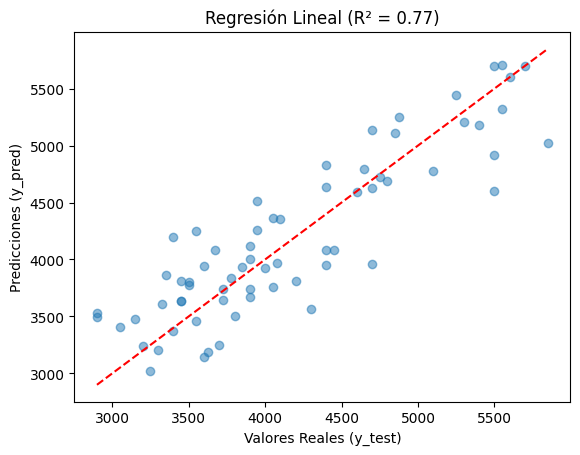

In [27]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea de referencia perfecta
plt.xlabel("Valores Reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title(f"Regresión Lineal (R² = {test_score:.2f})")
plt.show()

<div class="alert alert-info", role="success">
    <h1 style="font-size: 2em;">Utilizando el dataset Diamonds, entrene un modelo para la prediccion del precio del diamante usando solo las variables numericas. </h1>
</div>


## **[11]** Cargue el dataset y elimine los NaNs si el dataset cuenta con alguno.

In [28]:
import seaborn as sns
data = sns.load_dataset('diamonds')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [29]:
print("Valores NaN por columna:")
print(data.isna().sum())


Valores NaN por columna:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


## **[12]** Seleccione solo las columnas numéricas y genere su conjunto X, Y

In [30]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
print("Columnas numéricas seleccionadas:")
print(numeric_data.columns.tolist())

Columnas numéricas seleccionadas:
['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


In [31]:
# Definir X e y
X = numeric_data.drop(columns=['price'])  # Matriz de características
y = numeric_data['price']                 # Vector objetivo

# Verificar formas
print("\nForma de X:", X.shape)  # Ejemplo: (53940, 6) → 6 características
print("Forma de y:", y.shape)    # Ejemplo: (53940,)  → 1 target


Forma de X: (53940, 6)
Forma de y: (53940,)


## **[13]** Divida el dataset en conjunto de Train y Test

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividir en train (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características (recomendado para modelos lineales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nEjemplo de X_train estandarizado:")
print(X_train_scaled[:5])


Ejemplo de X_train estandarizado:
[[ 2.56005606 -2.55074762  2.93386055  2.22945022  2.13820916  1.73820671]
 [ 0.44739205 -1.22042647  1.13957453  0.74754991  0.65671016  0.5377332 ]
 [ 0.63753181  0.52999608  0.24243153  0.76540413  0.70028366  0.79195112]
 [ 1.48259742 -0.17017294  3.38243206  1.31888497  1.24930976  1.24389409]
 [ 1.5248507   0.24992847 -0.20613998  1.37244763  1.38003026  1.39924948]]


## **[14]** Entrene el modelo de predicción mediante Regresión Lineal

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Crear y entrenar modelo
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predecir y evaluar
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f"\nR² del modelo: {r2:.4f}")


R² del modelo: 0.8590


## **[15]** Calcule el *score* de su modelo

In [34]:
train_score = model.score(X_train_scaled, y_train)  # R² para entrenamiento
test_score = model.score(X_test_scaled, y_test)     # R² para prueba

print(f"R² en entrenamiento: {train_score:.4f}")  
print(f"R² en prueba: {test_score:.4f}")    
print(f'\nEl score obtenido por el modelo es {model.score(X_test_scaled, y_test):.4f}')    

R² en entrenamiento: 0.8593
R² en prueba: 0.8590

El score obtenido por el modelo es 0.8590


<div class="alert alert-success", role="alert">
    <h1 style="font-size: 1.5em;">Parte 2 </h1>
    <h2 style="font-size: 1.5em; "><strong>Regresión Logística con SKLearn</strong></h2>
</div>

La Regresión Logística es un caso de la Regresión Lineal, con la única diferencia de que en este caso se utiliza solo para variables discretas o categóricas. Por lo cual, nuestra variable objetivo o **target** es una categoría dentro del dataset y la salida del modelo de predicción se limita a los valores disponibles dentro de la variable que se esta prediciendo.

**basado en: https://www.aprendemachinelearning.com/regresion-logistica-con-python-paso-a-paso/**

In [35]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

## Cargamos los datos de entrada del archivo csv
En este caso el dataset tiene 3 categorías de usuarios de sistemas operativos, por lo cual, se creará un modelo de prediccián de que tipo de usuario se trata basado en ciertos atributos de cada tipo de usuario.

In [36]:
dataframe = pd.read_csv(r"usuarios_win_mac_lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [37]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


## Exploramos un poco el dataset

In [38]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


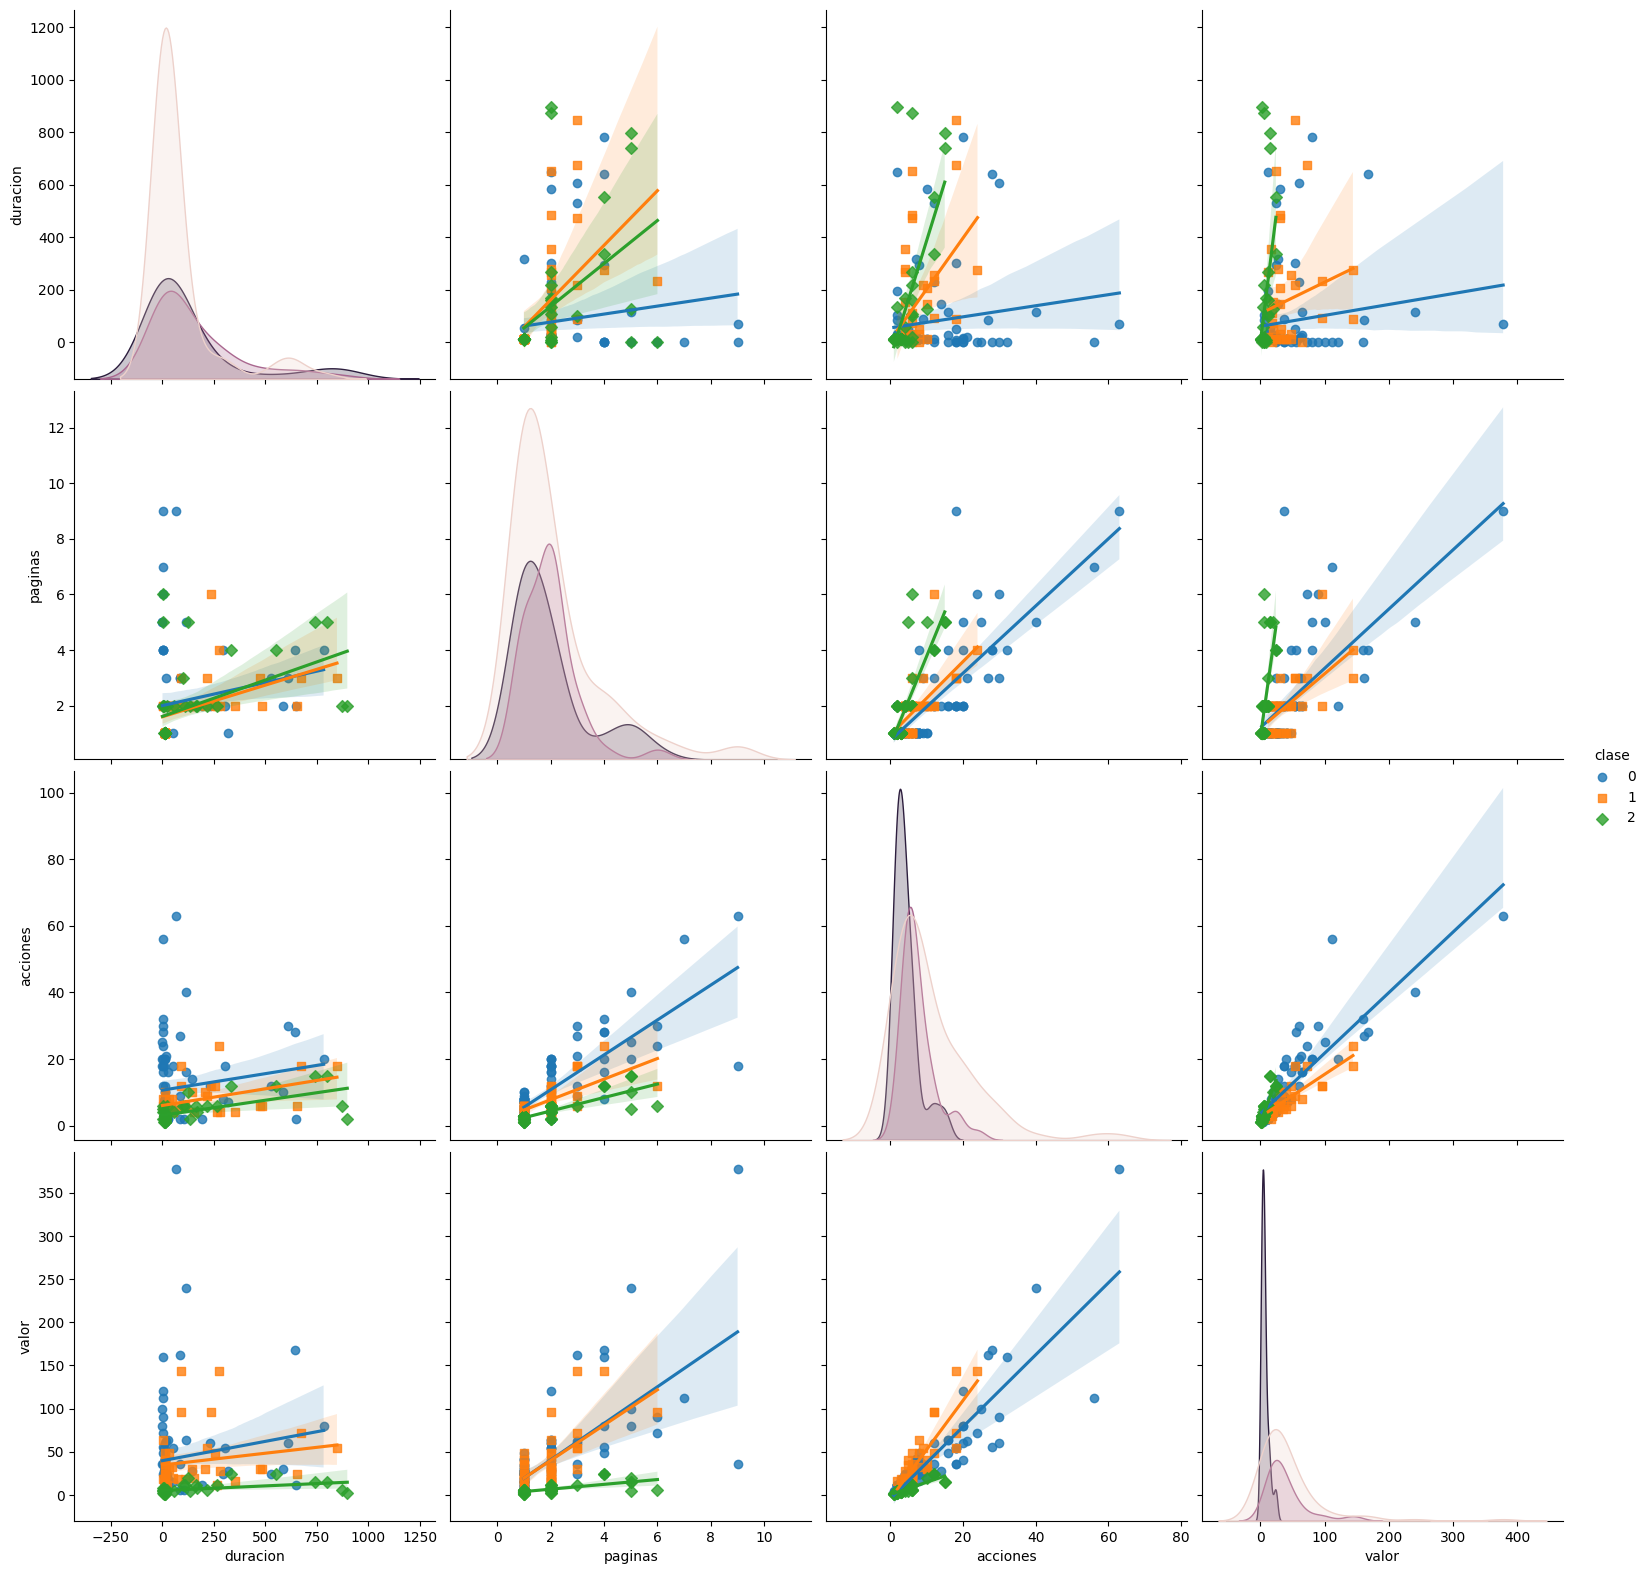

In [39]:
sb.pairplot(dataframe.dropna(), 
            hue='clase',
            height=4,
            vars=["duracion", "paginas","acciones","valor"],
            kind='reg',  
            markers=["o", "s", "D"])

## Creamos el modelo

In [40]:
# Definición de los elementos X & Y
X = np.array(dataframe.drop(['clase'], axis='columns'))
y = np.array(dataframe['clase'])
X.shape

(170, 4)

In [41]:
# Escalamiento de los datos
Usersc_X = StandardScaler()
X_trainSC=Usersc_X.fit_transform(X)

In [42]:
# Entrenamiento del Modelo
model = linear_model.LogisticRegression(max_iter=500)
model.fit(X_trainSC,y)

LogisticRegression(max_iter=500)

In [43]:
# Clase que el modelo predijo para cada instancia
predictions = model.predict(X_trainSC)
print(predictions[::5])

[2 2 2 2 0 1 2 2 0 1 0 0 2 0 0 1 0 0 0 2 0 0 2 2 2 2 0 0 0 2 0 2 0 0]


## En este caso el **score** del modelo se trata de una medida de la exactitud/accuracy del modelo usando sus predicciones sobre el conjunto de datos, esta se entiende como la cantidad de aciertos divida entre la cantidad total de instancias.



In [44]:
print(f'El porcentaje de aciertos del modelo fue {model.score(X_trainSC,y)}')

El porcentaje de aciertos del modelo fue 0.7


## Validación del Modelo
En este caso se realiza una división del dataset en train/test y se usa un enfoque de Cross Validation para evaluar la exactitud de un modelo entrenado usando una secuencia de train y test.

Más Información: https://datascientest.com/en/the-importance-of-cross-validation

In [45]:
validation_size = 0.20
seed = 5
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X_trainSC, y, test_size=validation_size, random_state=seed)

In [46]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "Clasificador de %s: %f STD: (%f)" % (name, cv_results.mean(), cv_results.std())
print(f'El resultado del modelo evaluado con Cross Validation fue\n:  {msg}')

El resultado del modelo evaluado con Cross Validation fue
:  Clasificador de Logistic Regression: 0.647253 STD: (0.121919)


## De igual manera se puede calcular el accuracy mediante el método **accuracy_score** de SKLearn, el cual recibe el valor real para cada instancia y la predicción realizada para cada instancia.

In [47]:
predictions = model.predict(X_validation)
print(f'El resultado del modelo evaluado con usando el conjunto de validación es:  {accuracy_score(Y_validation, predictions):.4f}.')

El resultado del modelo evaluado con usando el conjunto de validación es:  0.8529.


## Reporte de Resultados y Matriz de Confusión
### Classification Report
El reporte de resultados que genera SKLearn utiliza las predicciones y el valor real para cada instancia y calcula un conjunto de métricas que permiten entender el comportamiento y los resultados del clasificador.


In [48]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       1.00      0.56      0.71         9
           2       0.78      1.00      0.88         7

    accuracy                           0.85        34
   macro avg       0.88      0.83      0.83        34
weighted avg       0.87      0.85      0.84        34



### Matriz de Confusión 
La matriz de confusión es un elemento fundamental para el aprendizaje supervisado en la predicción de categorías. Esta permite entender el comportamiento del modelo en comparativa con todas las categorías del dataset. Sus análisis permite identificar donde estan los errores del modelo y entre cuales clases se presenta una mayor confusión. 

Se presentan 2 maneras de calcularla, la primera mediante la función *confusion_matrix* la cual devuelve una cadena con la configuración de la matriz. 
La segunda manera se enfoca en utilizar una función de SKLearn que permite generar la matriz de confusión de manera Gráfica usando internamente Seaborn y MatPlotLib. Esta recibe el modelo y un conjunto de valores para realizar la predicciones y generar los datos de la matriz. 

Esta función recibe un parámetro *normalize='true'* que permite que los valores en las celdas se expresen normalizados, de tal manera se pueda realizar una comparativa más entandarizada.

Más información: https://www.juanbarrios.com/la-matriz-de-confusion-y-sus-metricas/

In [49]:
print(confusion_matrix(Y_validation, predictions))

[[17  0  1]
 [ 3  5  1]
 [ 0  0  7]]


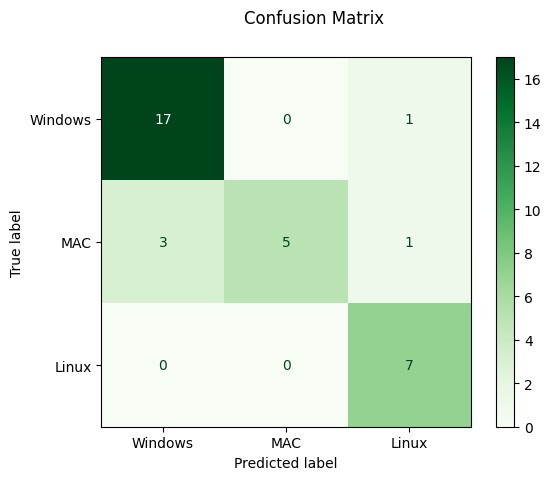

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
categorias = ["Windows","MAC","Linux"]
fig=ConfusionMatrixDisplay.from_estimator(model, X_validation, Y_validation,display_labels=categorias, cmap="Greens")  
fig.figure_.suptitle("Confusion Matrix")
plt.show()

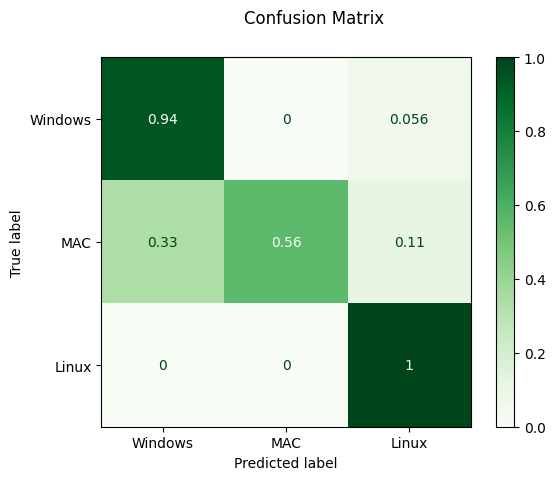

In [51]:
# Matriz de Confusión Normalizada

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
categorias = ["Windows","MAC","Linux"]
fig=ConfusionMatrixDisplay.from_estimator(model, X_validation, Y_validation,display_labels=categorias, cmap="Greens", normalize='true')  
fig.figure_.suptitle("Confusion Matrix")
plt.show()

# Clasificación de nuevos registros

In [52]:
# Se crea un arreglo con valores definidos por el programador, 
# para probar la predicción del modelo. 
X_new = np.array([8,38,5,1]).reshape(1, -1) 
        #pd.DataFrame({'duracion': [8], 'paginas': [38], 'acciones': [5], 'valor': [1]})
pred=model.predict(Usersc_X.inverse_transform(X_new))
f"La información ingresada corresponde con un usuario de {categorias[pred[0]]}."

'La información ingresada corresponde con un usuario de MAC.'

<div class="alert alert-info", role="success">
    <h1 style="font-size: 2em;">Entrene un modelo para la predicción de la Especie del Pinguino usando solo los datos numéricos presentes en el dataset. </h1>
</div>

**obs.** Retirar también la variable 'year' del dataset

## **[16]** Cargue el dataset y elimine los NaNs si existen

In [53]:
import pandas as pd
preprocess_penguins_df = pd.read_csv("penguins_size.csv")
preprocess_penguins_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [54]:
cleaned_penguins = preprocess_penguins_df.dropna()
if 'year' in cleaned_penguins.columns:
    cleaned_penguins = cleaned_penguins.drop(columns=['year'])


print(f"Filas originales: {len(preprocess_penguins_df)}")
print(f"Filas después de eliminar NaN: {len(cleaned_penguins)}")

Filas originales: 344
Filas después de eliminar NaN: 334


## **[17]** Genere el dataset solo con las variables numéricas (funcion **.drop()**), separe X & Y para el entrenamiento

In [55]:
numeric_penguins = cleaned_penguins.drop(columns=cleaned_penguins.select_dtypes(exclude=['int64', 'float64']).columns)
print("Columnas numéricas seleccionadas:")
print(numeric_penguins.columns.tolist())

Columnas numéricas seleccionadas:
['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']


In [56]:
le = LabelEncoder()
y = le.fit_transform(cleaned_penguins['species'])  # Convertir especies a valores numéricos

# Definir X excluyendo cualquier columna no numérica que haya quedado
X = numeric_penguins

# Verificar formas finales
print("\nForma de X:", X.shape)
print("Forma de y:", y.shape)
print("\nPrimeras filas de X:")
print(X.head())


Forma de X: (334, 4)
Forma de y: (334,)

Primeras filas de X:
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0              39.1             18.7              181.0       3750.0
1              39.5             17.4              186.0       3800.0
2              40.3             18.0              195.0       3250.0
4              36.7             19.3              193.0       3450.0
5              39.3             20.6              190.0       3650.0


## **[18]** Entrene el modelo de predicción mediante Regresión Logística

In [57]:
# Crear pipeline con escalado y modelo
model = make_pipeline(
    StandardScaler(),  # Escalar características para mejor rendimiento
    LogisticRegression(
        max_iter=1000,             # Asegurar convergencia
        random_state=42,           # Reproducibilidad
        solver='lbfgs'             # Algoritmo adecuado para problemas multiclase
    )
)

# Entrenar el modelo
model.fit(X, y)

print("Modelo de regresión logística entrenado exitosamente!")
print(f"Precisión en entrenamiento: {model.score(X, y):.2f}")

Modelo de regresión logística entrenado exitosamente!
Precisión en entrenamiento: 0.99


## **[19]** Calcule el *score* de su modelo

In [58]:

# 1. Calcular precisión en los datos de entrenamiento (para referencia)
train_accuracy = model.score(X, y)

# 2. Evaluación más robusta con validación cruzada (5 folds)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print(f"\nPrecisión en entrenamiento: {train_accuracy:.4f}")
print(f"Precisión en validación cruzada: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

print(f'\nEl score obtenido por el modelo es {model.score(X, y):.4f}')


Precisión en entrenamiento: 0.9910
Precisión en validación cruzada: 0.9910 (±0.0119)

El score obtenido por el modelo es 0.9910


In [59]:
# Predecir en todos los datos (o usar X_test si disponible)
y_pred = model.predict(X)

print("\nReporte de clasificación completo:")
print(classification_report(y, y_pred, target_names=le.classes_))


Reporte de clasificación completo:
              precision    recall  f1-score   support

      Adelie       0.99      0.99      0.99       146
   Chinstrap       0.99      0.97      0.98        68
      Gentoo       1.00      1.00      1.00       120

    accuracy                           0.99       334
   macro avg       0.99      0.99      0.99       334
weighted avg       0.99      0.99      0.99       334



## **[20]** Imprima las predicciones de categorías para las instancias usadas para el entrenamiento

In [60]:
# Obtener las predicciones para los datos de entrenamiento
y_train_pred = model.predict(X)

# Convertir los números de categoría a nombres de especies
species_pred = le.inverse_transform(y_train_pred)

# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'Instancia': X.index,
    'Especie Real': le.inverse_transform(y),
    'Especie Predicha': species_pred,
    'Correcto': (y == y_train_pred)
})

# Mostrar las primeras 10 predicciones
print("Predicciones para las instancias de entrenamiento:")
print(results.head(10))

# Calcular y mostrar la precisión global
accuracy = results['Correcto'].mean()
print(f"\nPrecisión global en entrenamiento: {accuracy:.2%}")

Predicciones para las instancias de entrenamiento:
   Instancia Especie Real Especie Predicha  Correcto
0          0       Adelie           Adelie      True
1          1       Adelie           Adelie      True
2          2       Adelie           Adelie      True
3          4       Adelie           Adelie      True
4          5       Adelie           Adelie      True
5          6       Adelie           Adelie      True
6          7       Adelie           Adelie      True
7         12       Adelie           Adelie      True
8         13       Adelie           Adelie      True
9         14       Adelie           Adelie      True

Precisión global en entrenamiento: 99.10%


In [61]:
incorrect = results[results['Correcto'] == False]
print("\nPredicciones incorrectas:")
print(incorrect)


Predicciones incorrectas:
     Instancia Especie Real Especie Predicha  Correcto
67          73       Adelie        Chinstrap     False
166        172    Chinstrap           Adelie     False
176        182    Chinstrap           Adelie     False


<div class="alert alert-info", role="success">
    <h1 style="font-size: 2em;">Convierta las variables categóricas Sex e Isla a un formato numérico y entrene un nuevo clasificador para la especie del pinguino </h1>
</div>


## **[21]** Cargue el Dataset y separe las secuencias X & Y para el entrenamiento.

In [62]:
# Cargar el dataset
penguins = pd.read_csv("penguins_size.csv")

# Eliminar filas con valores NaN y la columna 'year' si existe
cleaned_penguins = penguins.dropna().drop(columns=['year'], errors='ignore')

print(f"Dataset cargado con {len(cleaned_penguins)} filas después de limpieza")

Dataset cargado con 334 filas después de limpieza


In [63]:
# Seleccionar solo columnas numéricas para X (excluyendo categóricas)
numeric_cols = cleaned_penguins.select_dtypes(include=['float64', 'int64']).columns
X = cleaned_penguins[numeric_cols]

# Mantener la columna 'species' como Y (sin codificar aún)
y = cleaned_penguins['species']

print("\nColumnas numéricas seleccionadas para X:")
print(X.columns.tolist())
print("\nVariable objetivo y (sin codificar):")
print(y.head())


Columnas numéricas seleccionadas para X:
['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

Variable objetivo y (sin codificar):
0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object


## **[22]** Aplique el LabelEncoder

In [64]:
# Crear instancias separadas de LabelEncoder para cada variable
le_sex = LabelEncoder()
le_island = LabelEncoder()
le_species = LabelEncoder()

# Aplicar a cada columna categórica (creando nuevas columnas codificadas)
cleaned_penguins['sex_encoded'] = le_sex.fit_transform(cleaned_penguins['sex'])
cleaned_penguins['island_encoded'] = le_island.fit_transform(cleaned_penguins['island'])
cleaned_penguins['species_encoded'] = le_species.fit_transform(cleaned_penguins['species'])

# Mostrar mapeo de categorías
print("\nMapeo de categorías a valores numéricos:")
print("Sexo:", dict(zip(le_sex.classes_, le_sex.transform(le_sex.classes_))))
print("Isla:", dict(zip(le_island.classes_, le_island.transform(le_island.classes_))))
print("Especie:", dict(zip(le_species.classes_, le_species.transform(le_species.classes_))))


Mapeo de categorías a valores numéricos:
Sexo: {'.': 0, 'FEMALE': 1, 'MALE': 2}
Isla: {'Biscoe': 0, 'Dream': 1, 'Torgersen': 2}
Especie: {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}


In [65]:
print("\nDataset con variables codificadas (primeras 5 filas):")
print(cleaned_penguins[['sex', 'sex_encoded', 'island', 'island_encoded', 'species', 'species_encoded']].head())


Dataset con variables codificadas (primeras 5 filas):
      sex  sex_encoded     island  island_encoded species  species_encoded
0    MALE            2  Torgersen               2  Adelie                0
1  FEMALE            1  Torgersen               2  Adelie                0
2  FEMALE            1  Torgersen               2  Adelie                0
4  FEMALE            1  Torgersen               2  Adelie                0
5    MALE            2  Torgersen               2  Adelie                0


## **[23]** Entrene el modelo de predicción mediante Regresión Logística para toda la data

In [66]:
# Preparar X e Y con TODAS las variables numéricas (originales + codificadas)
X_all = cleaned_penguins[['culmen_length_mm', 'culmen_depth_mm', 
                         'flipper_length_mm', 'body_mass_g',
                         'sex_encoded', 'island_encoded']]

y_all = cleaned_penguins['species_encoded']

print("Dimensiones de X e Y para entrenamiento completo:")
print(f"X shape: {X_all.shape}")
print(f"y shape: {y_all.shape}")

# Crear y entrenar el modelo con TODOS los datos
model_all = make_pipeline(
    StandardScaler(),
    LogisticRegression(
        multi_class='multinomial',
        max_iter=1000,
        random_state=42,
        solver='lbfgs'
    )
)

# Entrenar el modelo con TODA la data
model_all.fit(X_all, y_all)



Dimensiones de X e Y para entrenamiento completo:
X shape: (334, 6)
y shape: (334,)


c:\Users\edegr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, multi_class='multinomial',
                                    random_state=42))])

## **[24]** Calcule el *score* de su modelo

In [67]:
# Calcular el score (precisión) en TODOS los datos
accuracy_all = model_all.score(X_all, y_all)

print(f"\nPrecisión del modelo entrenado con TODA la data: {accuracy_all:.4f}")
print(f"Esto significa que clasifica correctamente el {accuracy_all:.2%} de los pingüinos")

# CALCULAR EL SCORE 
print(f'\nEl score obtenido por el modelo es {model_all.score(X_all, y_all):.4f}')


Precisión del modelo entrenado con TODA la data: 0.9940
Esto significa que clasifica correctamente el 99.40% de los pingüinos

El score obtenido por el modelo es 0.9940


## **[25]** Divida esta secuencia anterior en Train/Test 

In [68]:
penguins = pd.read_csv("penguins_size.csv")
cleaned_penguins = penguins.dropna().drop(columns=['year'], errors='ignore')

# 2. Aplicar LabelEncoder a variables categóricas
le_sex = LabelEncoder()
le_island = LabelEncoder()
le_species = LabelEncoder()

cleaned_penguins['sex_encoded'] = le_sex.fit_transform(cleaned_penguins['sex'])
cleaned_penguins['island_encoded'] = le_island.fit_transform(cleaned_penguins['island'])
cleaned_penguins['species_encoded'] = le_species.fit_transform(cleaned_penguins['species'])

# 3. Preparar X e Y
X = cleaned_penguins[['culmen_length_mm', 'culmen_depth_mm', 
                     'flipper_length_mm', 'body_mass_g',
                     'sex_encoded', 'island_encoded']]

y = cleaned_penguins['species_encoded']

# 4. Dividir en Train/Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

print("Division completada:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Division completada:
X_train: (267, 6), y_train: (267,)
X_test: (67, 6), y_test: (67,)


## **[26]** Entrene el modelo de predicción mediante Regresión Logística

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Crear pipeline con escalado y modelo de regresión logística
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(
        multi_class='multinomial',  # Para clasificación multiclase (3 especies)
        max_iter=1000,              # Asegurar convergencia
        random_state=42,
        solver='lbfgs'              # Algoritmo adecuado para multiclase
    )
)
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

c:\Users\edegr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, multi_class='multinomial',
                                    random_state=42))])

## **[27]** Calcule el *score* de su modelo 

In [70]:
# Calcular scores en train y test
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Precisión en entrenamiento: {train_score:.4f}")
print(f"Precisión en prueba: {test_score:.4f}")

# CALCULAR EL SCORE 
print(f'\nEl score obtenido por el modelo es {model.score(X_test, y_test):.4f}')

Precisión en entrenamiento: 0.9963
Precisión en prueba: 1.0000

El score obtenido por el modelo es 1.0000


## **[28]** Genere la matriz de confusión de los datos de test 

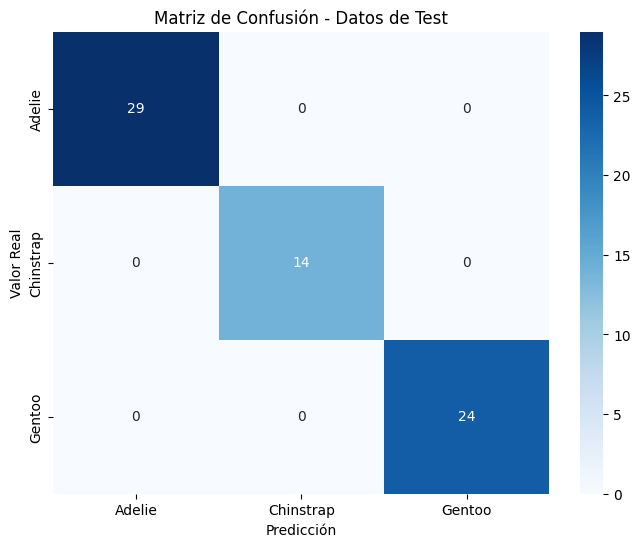

Matriz de Confusión:
[[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]

Leyenda:
0: Adelie
1: Chinstrap
2: Gentoo


In [71]:
# Predecir las clases para los datos de test
y_pred = model.predict(X_test)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le_species.classes_, 
            yticklabels=le_species.classes_)
plt.title('Matriz de Confusión - Datos de Test')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Mostrar también la matriz en formato numérico
print("Matriz de Confusión:")
print(cm)
print("\nLeyenda:")
for i, especie in enumerate(le_species.classes_):
    print(f"{i}: {especie}")

<div class="alert alert-info", role="success">
    <h1 style="font-size: 2em;">Entrene un modelo de clasificación para el atributo <strong>cut</strong> del dataset Diamonds.</h1>
</div>

## **[29]** Cargue el dataset y elimine los NaNs de ser necesario

In [3]:
diamonds_df = sns.load_dataset('diamonds')
diamonds_df_clean = diamonds_df.dropna()
diamonds_df_clean.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
print("Valores NaN por columna:")
print(diamonds_df_clean.isna().sum())

Valores NaN por columna:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [5]:
diamonds_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


## **[30]** Genere las secuencias X & Y para entrenar el modelo

In [6]:
X_diamonds = diamonds_df_clean.select_dtypes(include=['float64', 'int64']).drop(columns=['price'])
y_diamonds = diamonds_df_clean['price']

print("Columnas numéricas seleccionadas:")
numeric_cols = diamonds_df_clean.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols.tolist())

# Verificar formas
print("\nForma de X:", X_diamonds.shape) 
print("Forma de y:", y_diamonds.shape)    


Columnas numéricas seleccionadas:
['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

Forma de X: (53940, 6)
Forma de y: (53940,)


## **[31]** Aplique el LabelEncoder

In [7]:
from sklearn.preprocessing import LabelEncoder

# Seleccionamos las columnas categóricas de diamonds_df_clean
categorical_cols = diamonds_df_clean.select_dtypes(include=['category']).columns.tolist()
print("Columnas categóricas a codificar:", categorical_cols)
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    diamonds_df_clean[col] = le.fit_transform(diamonds_df_clean[col])
    label_encoders[col] = le

    # Mostrar mapeo de categorías
    print(f"\nCodificación para {col}:")
    print(dict(zip(le.classes_, le.transform(le.classes_))))


Columnas categóricas a codificar: ['cut', 'color', 'clarity']

Codificación para cut:
{'Fair': 0, 'Good': 1, 'Ideal': 2, 'Premium': 3, 'Very Good': 4}

Codificación para color:
{'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

Codificación para clarity:
{'I1': 0, 'IF': 1, 'SI1': 2, 'SI2': 3, 'VS1': 4, 'VS2': 5, 'VVS1': 6, 'VVS2': 7}


In [8]:
# Verificar resultado
print("\nDataset después de codificación:")
print(diamonds_df_clean.head())


Dataset después de codificación:
   carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2   0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
3   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75


In [9]:
diamonds_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int32  
 2   color    53940 non-null  int32  
 3   clarity  53940 non-null  int32  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int32(3), int64(1)
memory usage: 3.5 MB


## **[32]** Divida el dataset en conjunto de Train y Test

In [10]:
validation_size = 0.20
seed = 5

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X_diamonds, y_diamonds,
    test_size=validation_size,
    random_state=seed
)

print("\nDivision creada:")
print(f"Train shapes - X: {X_train_d.shape}, y: {y_train_d.shape}")
print(f"Test shapes - X: {X_test_d.shape}, y: {y_test_d.shape}")


Division creada:
Train shapes - X: (43152, 6), y: (43152,)
Test shapes - X: (10788, 6), y: (10788,)


In [11]:
print(f'El conjunto original tenia {len(diamonds_df_clean)} instancias, el conjunto de train tiene {len(X_train_d)} y el conjunto de test {len(X_test_d)} instancias.')

El conjunto original tenia 53940 instancias, el conjunto de train tiene 43152 y el conjunto de test 10788 instancias.


## **[33]** Entrene el modelo de predicción mediante Regresión Logística

In [12]:
# Seleccionar las variables predictoras (excluyendo la variable objetivo 'price')
X_features = diamonds_df_clean.drop(columns=['price'])
y_price = diamonds_df_clean['price']

# Aplicar SelectKBest para seleccionar las 5 mejores características
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X_features, y_price)

# Mostrar las columnas seleccionadas
selected_columns = X_features.columns[selector.get_support()]
print("Variables seleccionadas por SelectKBest:", selected_columns.tolist())

Variables seleccionadas por SelectKBest: ['carat', 'color', 'x', 'y', 'z']


In [13]:
# Entrenar el modelo de clasificación para 'price' usando las variables numéricas
# X: variables numéricas seleccionadas por SelectKBest y escaladas, y: variable objetivo 'price' ya codificada
X = diamonds_df_clean[['carat', 'color', 'x', 'y', 'z']]
y = diamonds_df_clean['price']

# Dividir el conjunto de datos en entrenamiento y prueba luego de la selección de características
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X, y,
    test_size=validation_size,
    random_state=seed
)

# se utiliza para escalar los valores en un mismo rango
sc_X = StandardScaler()
X_trainSC = sc_X.fit_transform(X_train_d)
X_testSC  = sc_X.transform(X_test_d)

print("\nDivision creada:")
print(f"Train shapes - X: {X_train_d.shape}, y: {y_train_d.shape}")
print(f"Test shapes - X: {X_test_d.shape}, y: {y_test_d.shape}")



Division creada:
Train shapes - X: (43152, 5), y: (43152,)
Test shapes - X: (10788, 5), y: (10788,)


In [14]:
logreg_model = LogisticRegression(
    max_iter=20,
    class_weight='balanced',
    random_state=seed,
    solver='sag'  # Usar 'sag' para problemas grandes
)
logreg_model.fit(X_trainSC, y_train_d)

c:\Users\edegr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=20, random_state=5,
                   solver='sag')

## **[34]** Calcule el *score* de su modelo

In [15]:
# realizar la prediccion
predicted = logreg_model.predict(X_testSC)
expected = y_test_d

# Imprimir cada 5 valores de la predicción 
for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

print(f'El score obtenido por el modelo es {logreg_model.score(X_testSC, y_test_d)}')

predicted: 10108.00, expected: 3629.00
predicted: 340.00, expected: 465.00
predicted: 15686.00, expected: 1657.00
predicted: 340.00, expected: 478.00
predicted: 15686.00, expected: 838.00
predicted: 340.00, expected: 532.00
predicted: 15686.00, expected: 716.00
predicted: 340.00, expected: 2587.00
predicted: 16193.00, expected: 4327.00
predicted: 18018.00, expected: 16881.00
predicted: 5207.00, expected: 2613.00
predicted: 15964.00, expected: 8190.00
predicted: 5207.00, expected: 3867.00
predicted: 546.00, expected: 2016.00
predicted: 15964.00, expected: 12547.00
predicted: 13579.00, expected: 4378.00
predicted: 15686.00, expected: 608.00
predicted: 15686.00, expected: 1013.00
predicted: 546.00, expected: 1551.00
predicted: 15686.00, expected: 951.00
predicted: 16193.00, expected: 6749.00
predicted: 340.00, expected: 2536.00
predicted: 546.00, expected: 2290.00
predicted: 15686.00, expected: 671.00
predicted: 15964.00, expected: 6324.00
predicted: 15686.00, expected: 1389.00
predicted:

## **[35]** Genere la matriz de confusión de los datos de test 

In [16]:
print(f"X_testSC type: {type(X_testSC)}")
print(f"X_testSC shape: {X_testSC.shape}")
print(f"y_test_d type: {type(y_test_d)}")
print(f"y_test_d shape: {y_test_d.shape}")

X_testSC type: <class 'numpy.ndarray'>
X_testSC shape: (10788, 5)
y_test_d type: <class 'pandas.core.series.Series'>
y_test_d shape: (10788,)


In [ ]:
# Calcular predicciones y matriz (como ya hiciste)
y_pred = logreg_model.predict(X_testSC)
cm = confusion_matrix(y_test_d, y_pred)

# Visualización OPTIMIZADA
plt.figure(figsize=(8, 6))
sns.heatmap(cm, 
           annot=True, 
           fmt='d', 
           cmap='Greens',
           cbar=False,
           annot_kws={'size': 10})  # Texto más pequeño

plt.title('Confusion Matrix', fontsize=14, pad=20)
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Guardar en archivo en lugar de mostrar interactivo
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Matriz de confusión guardada como 'confusion_matrix.png'")

<div class="alert alert-info", role="success">
    <h1 style="font-size: 2em;">Utilizando el dataset Cancer de Seno entrene un modelo mediante Regresión Logística que permita diagnosticar la enfermedad basada en datos de entrada
 </h1>
</div>


## **[36]** Cargue el dataset y elimine los NaNs de ser necesario

In [ ]:
cancer_df = pd.read_csv("Breast_cancer_data.csv")

# Eliminar filas con valores NaN 
cancer_df_cleaned  = cancer_df.dropna()

print(f"Filas originales: {len(cancer_df)}")
print(f"Filas después de eliminar NaN: {len(cancer_df_cleaned)}")
print(f"Valores NaN eliminados: {len(cancer_df) - len(cancer_df_cleaned)}")

## **[37]** Genere el las secuencias X & Y para entrenar el modelo

In [ ]:
X = cancer_df_cleaned.drop(columns=['diagnosis'])  # Todas las características excepto el diagnóstico
y = cancer_df_cleaned['diagnosis']                 # Variable objetivo (diagnóstico)

# Verificar formas
print("Forma de X:", X.shape)
print("Forma de y:", y.shape)

# Mostrar primeras filas
print("\nPrimeras 5 filas de X:")
print(X.head())
print("\nPrimeras 5 valores de y:")
print(y.head())

## **[38]** Divida el dataset en conjunto de Train y Test

In [ ]:
# Dividir el dataset en(train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,       # 20% para test, 80% para entrenamiento
    random_state=42,     # Semilla para reproducibilidad
    stratify=y           # Mantener la proporción de clases en ambos conjuntos
)

# Verificar las dimensiones de los conjuntos
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

## **[39]** Entrene el modelo de predicción mediante Regresión Logística

In [ ]:
# Crear pipeline con escalado y modelo de regresión logística
model = make_pipeline(
    StandardScaler(),  # Escalar las características para mejor rendimiento
    LogisticRegression(
        random_state=42,
        max_iter=500   # Asegurar convergencia
    )
)
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

## **[40]** Calcule el *score* de su modelo

In [ ]:
# Calcular el score (precisión) en los conjuntos de entrenamiento y prueba
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Precisión en entrenamiento: {train_score:.4f}")
print(f"Precisión en prueba: {test_score:.4f}")

# CALCULAR EL SCORE 
print(f'\nEl score obtenido por el modelo es {model.score(X_test, y_test):.4f}')

## **[41]** Genere la matriz de confusión de los datos de test 

In [ ]:
# Generar la matriz de confusión
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Crear heatmap de la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            cbar=True,
            square=True,
            xticklabels=['Benigno (0)', 'Maligno (1)'], 
            yticklabels=['Benigno (0)', 'Maligno (1)'],
            annot_kws={'size': 8, 'weight': 'bold'})

# Personalizar el heatmap
plt.xlabel('PREDICCIÓN', fontsize=8, fontweight='bold')
plt.ylabel('VALOR REAL', fontsize=8, fontweight='bold')
plt.xticks(fontsize=8, rotation=0)
plt.yticks(fontsize=8, rotation=0)

# Añadir valores de precisión en las celdas
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        total_class = cm[i].sum()
        percentage = cm[i, j] / total_class * 100 if total_class > 0 else 0
        if i == j:  # Diagonal (predicciones correctas)
            plt.text(j + 0.5, i + 0.38, f'{cm[i, j]}\n({percentage:.1f}%)', 
                    ha='center', va='center', fontsize=8, fontweight='bold', color='green')
        else:  # Fuera de diagonal (errores)
            plt.text(j + 0.5, i + 0.38, f'{cm[i, j]}\n({percentage:.1f}%)', 
                    ha='center', va='center', fontsize=8, fontweight='bold', color='red')

plt.tight_layout()
plt.show()


<div class="alert alert-success", role="alert">
    <h1 style="font-size: 1.5em;">Parte 3 </h1>
    <h2 style="font-size: 1.5em; "><strong>Random Forest Utilizando SKLearn y Dataset Iris</strong></h2>
</div>


Random Forest es un clasificador basado en el ensamble de varios Árboles de Decisión. Se utiliza tanto para clasificación *RandomForestClassifier* o también en enfoques de regresión *RandomForestRegressor* para variables continuas. El ejemplo utiliza el dataset Iris para clasificar la especie o tipo de flor que se desea identificar basada en 4 variables.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

## Secuencias X & Y para entrenar el modelo

In [ ]:
data = load_iris(as_frame=True)
feature_names = data.data.columns
X, y = data.data, data.target

## Entenamiento y prueba del modelo

In [ ]:
#Definición del Modelo 
clf = RandomForestClassifier(n_jobs=2, random_state=0)
#fit/train -> Se hace el entrenamiendo del modelo
clf.fit(X,y)

RandomForestClassifier(n_jobs=2, random_state=0)

In [ ]:
#Creando un item con los atributos al azar para probar el modelo
vals = [[2, 2, 4, 2]]
X_pred = pd.DataFrame(vals, columns=feature_names) 
#Utilizar el modelo para predecir una especie para nuestra instancia
output = clf.predict(X_pred) 

In [ ]:
output

array([2])

## El modelo puede también calcular la probabilidad de cada categoría utilizando la función *predict_proba*

In [ ]:
print ('Predicción:', data.target_names[output])
print ('Opciones:', data.target_names)
print ('Probabilidades:', clf.predict_proba(X_pred))

Predicción: ['virginica']
Opciones: ['setosa' 'versicolor' 'virginica']
Probabilidades: [[0.   0.31 0.69]]


## Utilizar las features_importances_ calculadas por RandomForest

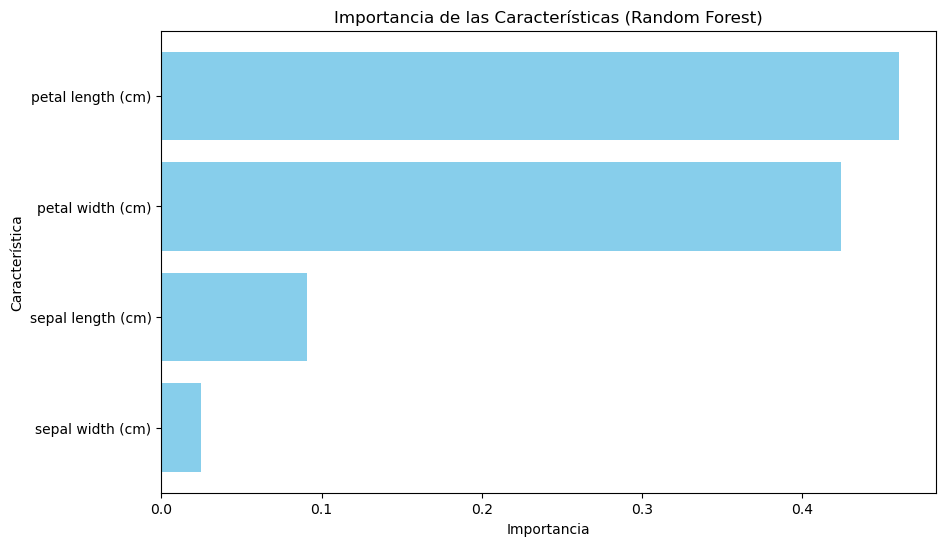

             feature  importance
2  petal length (cm)    0.460445
3   petal width (cm)    0.424116
0  sepal length (cm)    0.090908
1   sepal width (cm)    0.024531


In [ ]:
# Obtener las importancias de las características
importances = clf.feature_importances_

# Crear un DataFrame para facilitar la visualización
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Ordenar las características por importancia de mayor a menor
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características (Random Forest)')
plt.gca().invert_yaxis() # Invertir el eje y para que la característica más importante esté arriba
plt.show()

# Imprimir el DataFrame ordenado
print(feature_importance_df)


<div class="alert alert-info", role="success">
    <h1 style="font-size: 2em;">Entrene un clasificador de la isla de los pinguinos usando todas las columnas del dataset a excepción del años.</h1>
</div>

## **[42]** Cargue el dataset y elimine los NaNs de ser necesario

## **[43]** Genere el las secuencias X & Y para entrenar el modelo

## **[44]** Aplique el LabelEncoder

## **[45]** Divida el dataset en conjunto de Train y Test

## **[46]** Entrene el modelo de predicción mediante Random Forest

## **[47]** Calcule el *score* de su modelo

## **[48]** Genere la matriz de confusión de los datos de test 

supported values for cmap are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

<div class="alert alert-info", role="success">
    <h1 style="font-size: 2em;">Utilizando el dataset Cáncer de Seno entrene un modelo mediante Random Forest que permita diagnosticar la enfermedad basada en datos de entrada </h1>
</div>


## **[49]** Cargue el dataset y elimine los NaNs de ser necesario

## **[50]** Genere el las secuencias X & Y para entrenar el modelo

## **[51]** Divida el dataset en conjunto de Train y Test

## **[52]** Entrene el modelo de predicción mediante Random Forest

## **[53]** Calcule el *score* de su modelo

## **[54]** Genere la matriz de confusión de los datos de test 

<div class="alert alert-info", role="success">
    <h1 style="font-size: 2em;"> Utilizando Random Forest Regresor realice la predicción  del precio de los diamantes usando todas las columnas del dataset
 </h1>
</div>


## **[55]** Cargue el dataset y elimine los NaNs de ser necesario

## **[56]** Genere el las secuencias X & Y para entrenar el modelo

## **[57]** Aplique el LabelEncoder

## **[58]** Divida el dataset en conjunto de Train y Test

## **[59]** Entrene el modelo de Regresión mediante **RandomForestRegressor**

## **[60]** Calcule el *score* de su modelo

## **[61]** Grafique la Importancia de las Features de este dataset

## **[62]** Genere un dataframe donde almacene el valor real del conjunto **X** y la predicción para estos valores **X**. 
**Obs.** Utilice para la predicción el conjunto **X** de valores antes de ser dividido en train/test

## **[63]** Presente el *boxplot* para este dataset

## **[64]** Genere un *lineplot* del dataframe anterior donde compare las predicciones con el valor real. 
## Presente en este gráfico solo las primeras 500 instancias del conjunto. (```iloc[0:500]```) 

## **[65]** Conclusiones 